# Schelling's Model

#### Importing necessary libraries and setting global matplotlib parameters

In [13]:
# Import necessary libraries
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.pylab as pylab

# Set up parameters for Matplotlib to control the appearance of plots
params = {'axes.titlesize': 'medium',        # Title font size
          'figure.figsize': (10, 10),        # Default figure size
          'axes.labelsize': 'medium',        # Label font size
          'xtick.labelsize': 'medium',       # X-axis tick label font size
          'ytick.labelsize': 'medium'}       # Y-axis tick label font size

# Update Matplotlib parameters with the specified configurations
pylab.rcParams.update(params)

cmap = matplotlib.colors.ListedColormap(['grey','white', 'black'])

In [14]:
def is_happy(x, y, g, R):
  # Check if the agent at position (x, y) is happy based on the specified threshold R
  return good_neigh_num(x, y, g) >= R

def good_neigh_num(x, y, g):
  # Count the number of good neighbors around the agent at position (x, y)
  good = g[x, y]
  neighbors = g[x - 1 : x + 2, y - 1 : y + 2]

  good_neigh = 0
  for agent in neighbors.ravel():
    if good == agent:
      good_neigh += 1
    elif agent == 0:
      good_neigh += 0.5
  return good_neigh

def neigh_locations(x, y, grid):
  # Get the coordinates of non-zero neighbors around the agent at position (x, y)
  return [(i, j) for i in range(x - 1, x + 2) for j in range(y - 1, y + 2) if grid[i, j] != 0]

def to_update(x, y, grid, R):
  # Determine the new position for the agent at (x, y) based on happiness conditions
  happy = is_happy(x, y, grid, R)
  unhappy_loc = []
  happy_loc = []

  for i, j in neigh_locations(x, y, grid):
    if i == x and j == y:
      continue
    elif (not is_happy(i, j, grid ,R) and not happy and grid[x, y] != grid[i, j]):
      unhappy_loc.append((i, j))
    elif (is_happy(i, j, grid, R) and not happy and grid[x, y] != grid[i, j] and grid[i, j] != 0):
      if 9 - good_neigh_num(i, j, grid) >= good_neigh_num(x, y, grid):
        happy_loc.append((i, j))

  if len(unhappy_loc) != 0:
    x_new, y_new = random.choice(unhappy_loc)
  elif len(happy_loc) != 0:
    x_new, y_new = random.choice(happy_loc)
  else:
    return (-1, -1)

  # Swap positions of agents to update the grid
  grid[x, y], grid[x_new, y_new] = grid[x_new, y_new], grid[x, y]
  return x_new, y_new

def grid_evolution(R, size, iters):
  # Simulate the evolution of the grid based on specified parameters
  R = R * 8  # Adjust the threshold for happiness
  grid = np.zeros((size + 2, size + 2))
  grid[1:-1, 1:-1] = np.random.choice([0, 1, 2], (size, size), p=[0, 0.5, 0.5])  # Initialize grid with agents

  # Create a set of initially unhappy agent positions
  unhappy = [(i, j) for i in range(1, size) for j in range(1, size)]
  unhappy = set(unhappy)
  unhappy_time = np.zeros(iters)

  for iteration in range(iters):
    if len(unhappy) == 0:
      break

    unhappy_next = set()
    for x, y in unhappy:
      # Update the grid based on agent happiness conditions
      if not is_happy(x, y, grid, R):
        x_new, y_new = to_update(x, y, grid, R)
        if (x_new, y_new) != (-1, -1):
          unhappy_next.update(neigh_locations(x, y, grid))
          unhappy_next.update(neigh_locations(x_new, y_new, grid))

    unhappy = unhappy_next
    unhappy_time[iteration] = len(unhappy)

  # Return the final state of the grid and the number of unhappy agents at each iteration
  return grid[1:-1, 1:-1], unhappy_time


In [15]:
def plot_grid(R, size, iters):
  # Generate the grid evolution data using the grid_evolution function
  plot = grid_evolution(R, size, iters)[0]

  # Set the title of the plot with relevant information
  plt.title(f'Neighborhood greed for R = {R}, number of iterations = {iters}', y=1.02)

  # Display the grid using imshow, with specified colormap and value range
  plt.imshow(plot, cmap=cmap, vmin=0, vmax=2)

  # Add colorbar with ticks and labels
  cbar = plt.colorbar(ticks=[0, 1, 2], location='bottom', shrink=0.5, pad=0.08)
  cbar.ax.tick_params(labelsize=12)
  cbar.set_label(label='0 is empty, 1 is agent X, 2 is agent O', size=12)


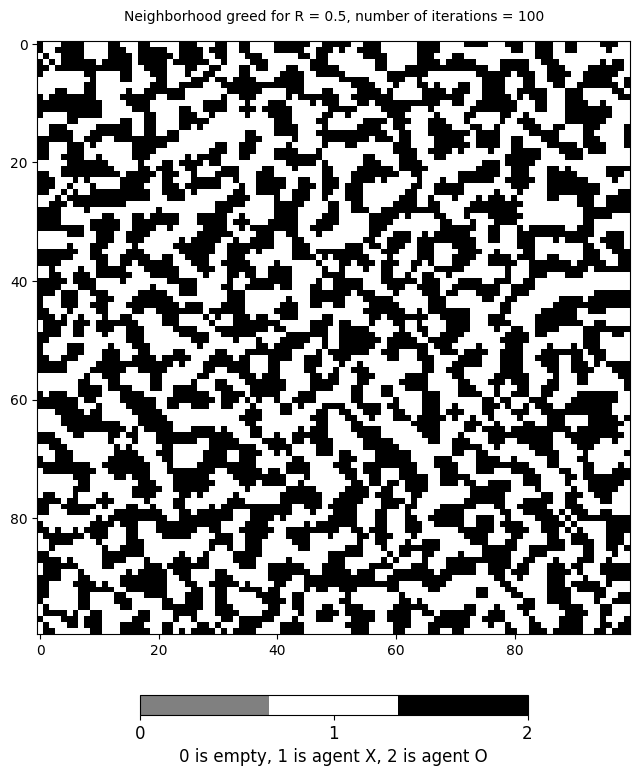

In [16]:
size = 100
R = 4/8
plot_grid(R, size , 100)

In [17]:
def save_gifs(R):
  # Create a new figure for the animation
  fig = plt.figure()

  # Initialize an empty plot
  plot = np.zeros((size + 2, size + 2))
  imshow = plt.imshow(plot, cmap=cmap, vmin=0, vmax=2)

  # Add colorbar with ticks and labels
  cbar = plt.colorbar(ticks=[0, 1, 2], location='bottom', shrink=0.5, pad=0.08)
  cbar.ax.tick_params(labelsize=12)
  cbar.set_label(label='0 is empty, 1 is agent X, 2 is agent O', size=12)

  def anim(i):
    # Animation function to update the plot for each iteration
    plt.cla()  # Clear previous plot
    plot = grid_evolution(R, size, i)[0]
    plt.title(f'Neighborhood greed for R = {R}, number of iterations = {i}', y=1.02)
    plt.imshow(plot, cmap=cmap, vmin=0, vmax=2)

  # Create an animation with FuncAnimation
  anim = FuncAnimation(fig, anim, frames=20, interval=8)

  # Save the animation as a GIF file
  anim.save(f"r_{R}.gif")

  # Close the plot to avoid displaying it in the notebook
  plt.close()

# Loop through different values of R and generate GIFs
for Rn in range(9):
  print(f"R = {Rn/8} is processing...", end=" ")
  save_gifs(Rn/8)
  print(f"Done!")


R = 0.0 is processing... Done!
R = 0.125 is processing... Done!
R = 0.25 is processing... Done!
R = 0.375 is processing... Done!
R = 0.5 is processing... Done!
R = 0.625 is processing... Done!
R = 0.75 is processing... Done!
R = 0.875 is processing... Done!
R = 1.0 is processing... Done!


### Displaying gifs, which we created

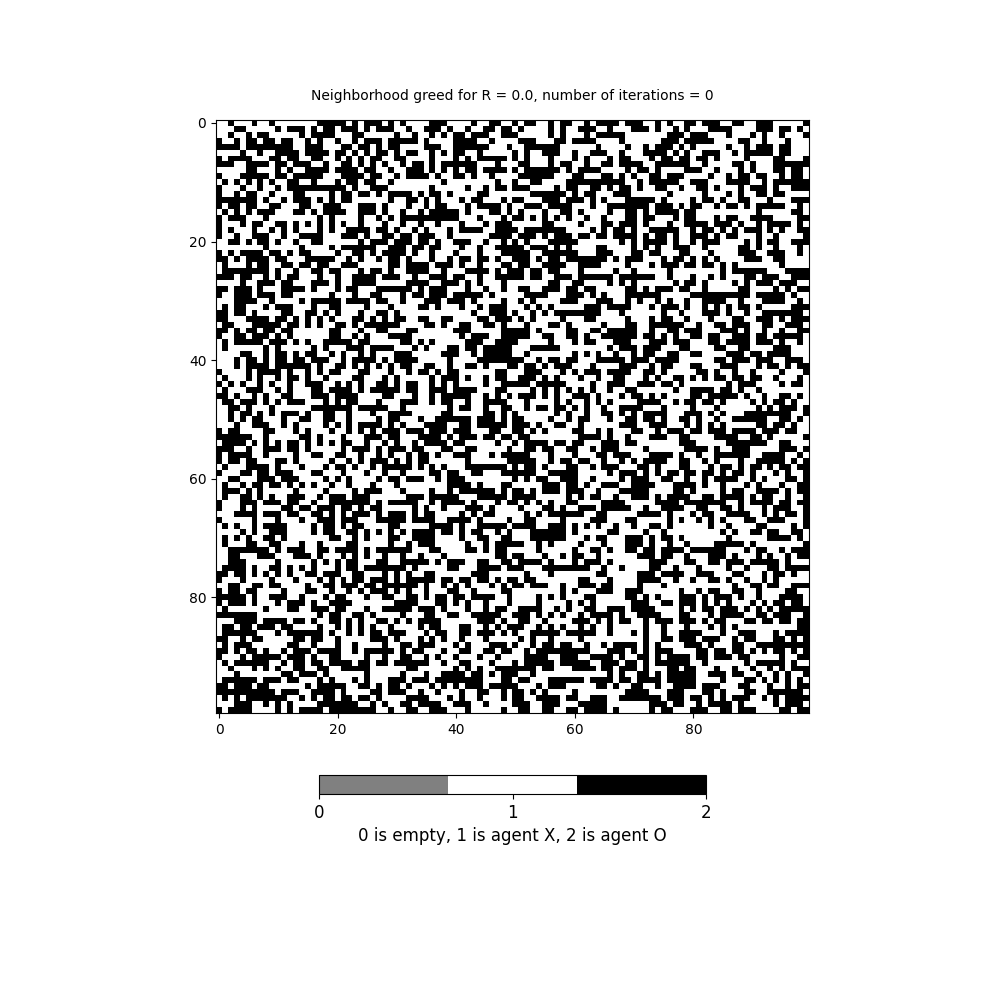

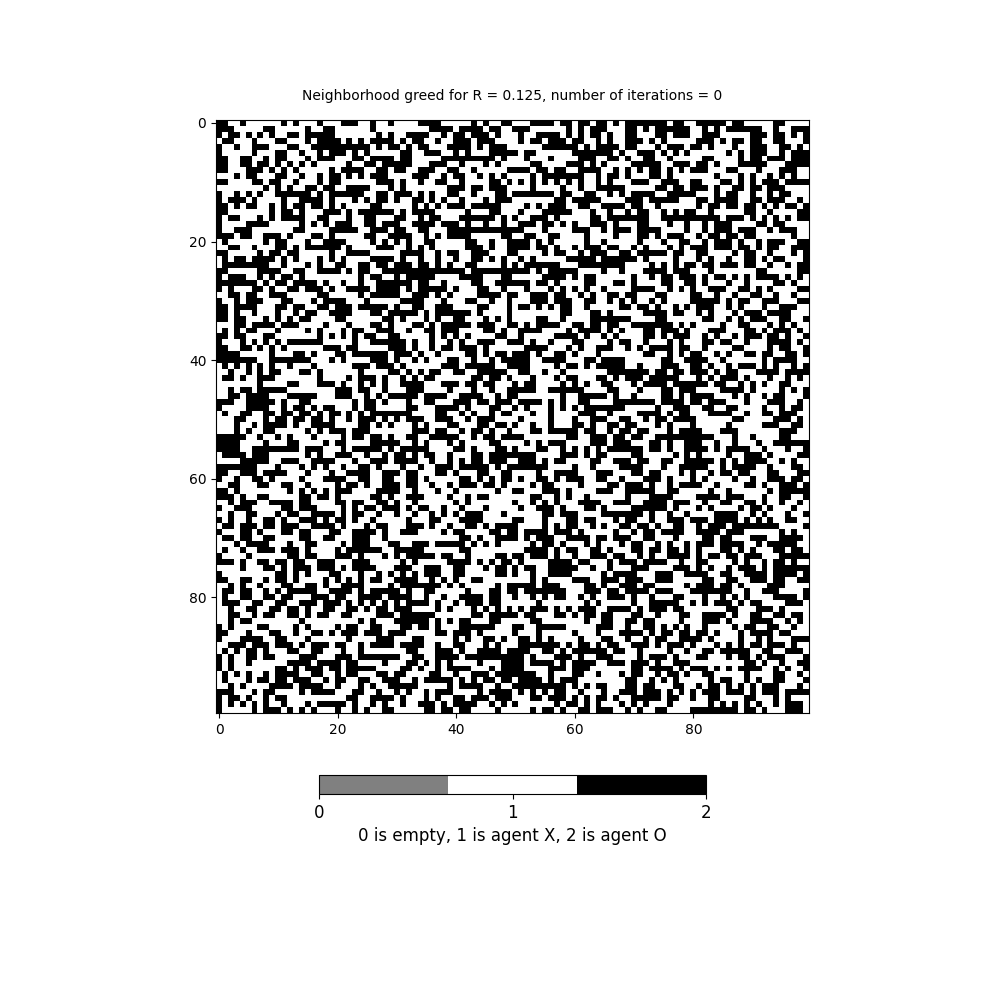

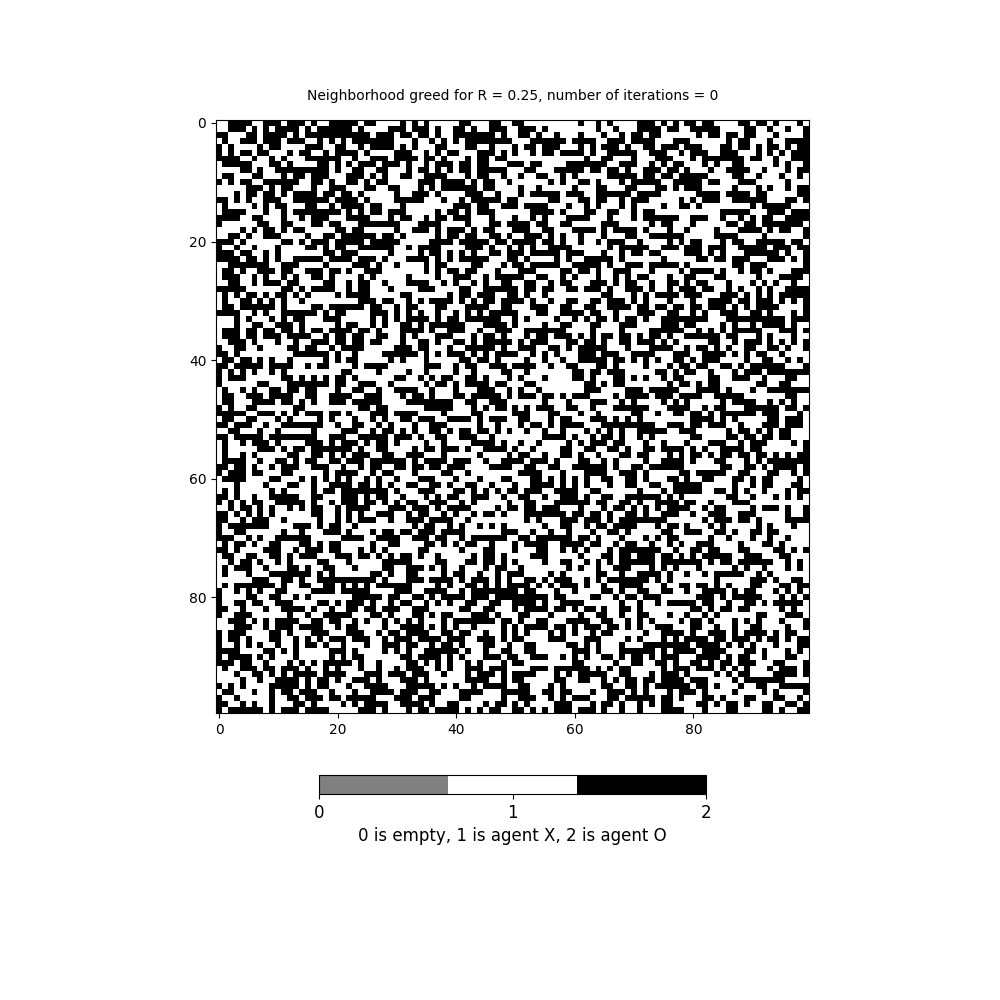

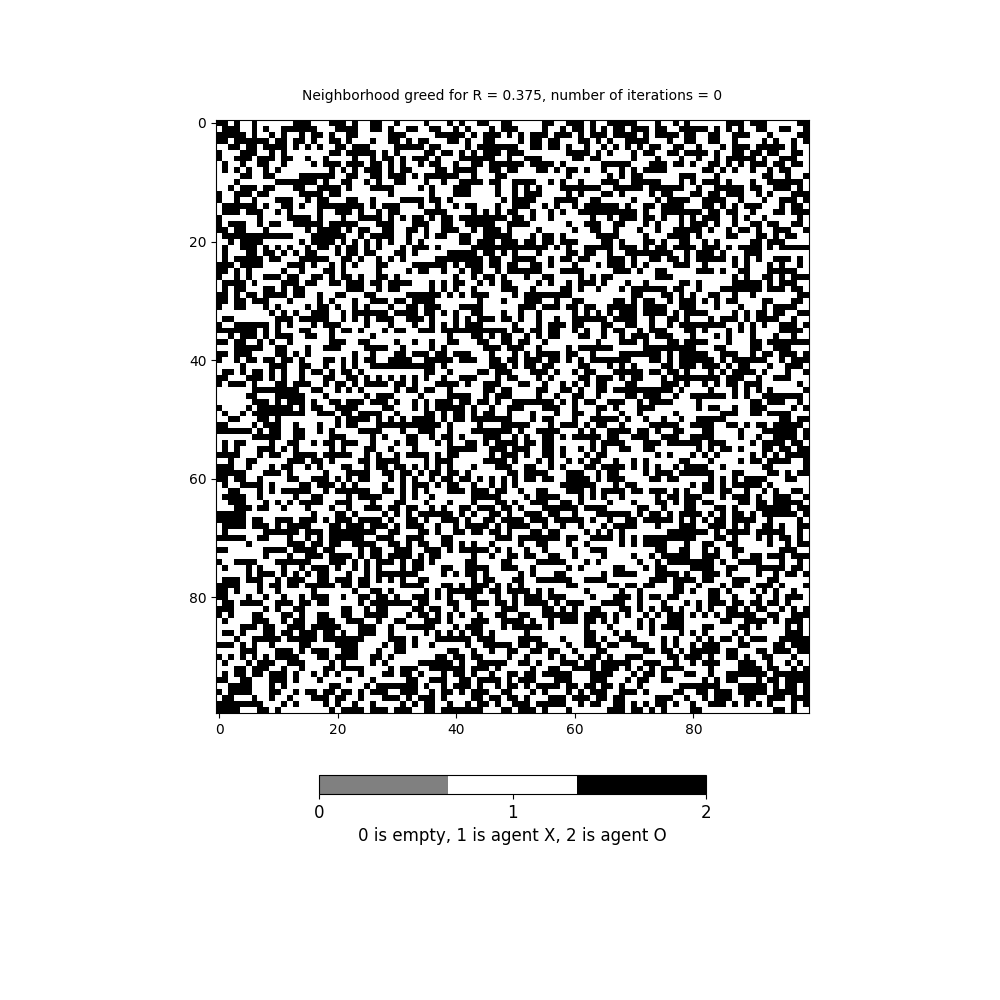

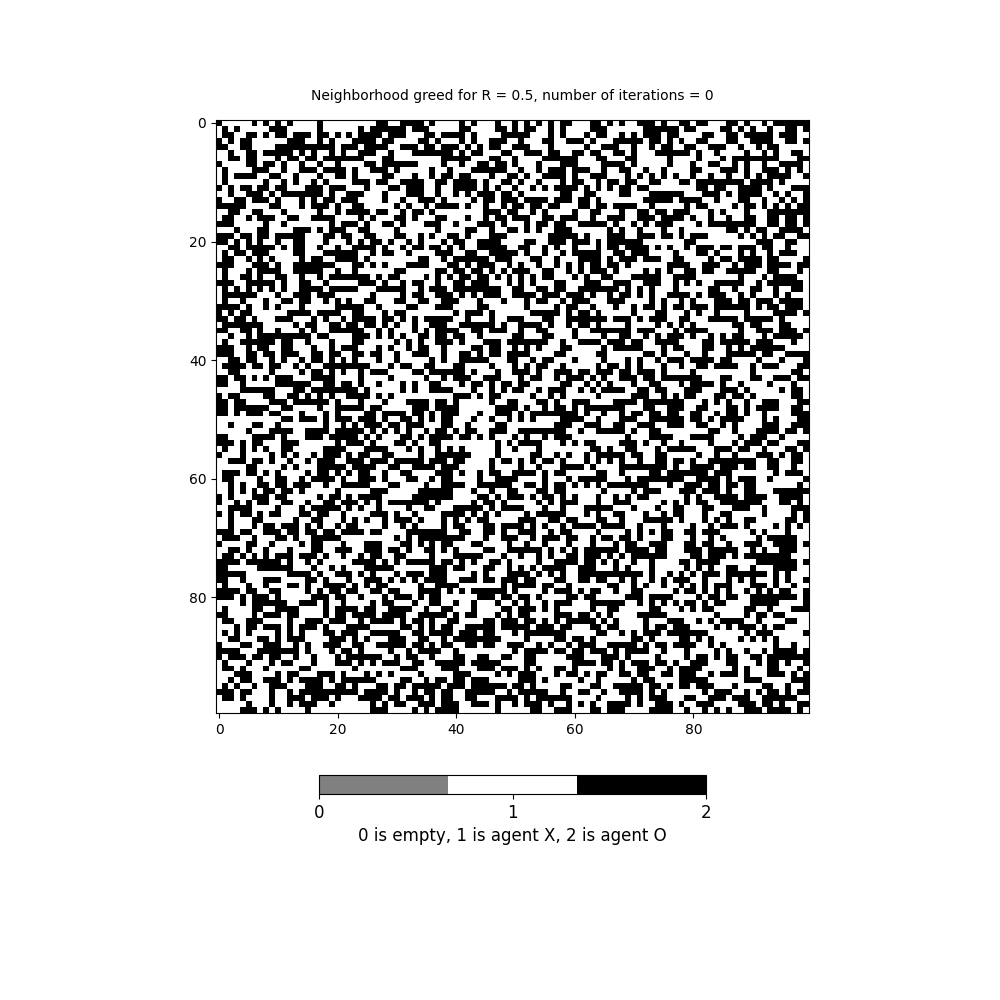

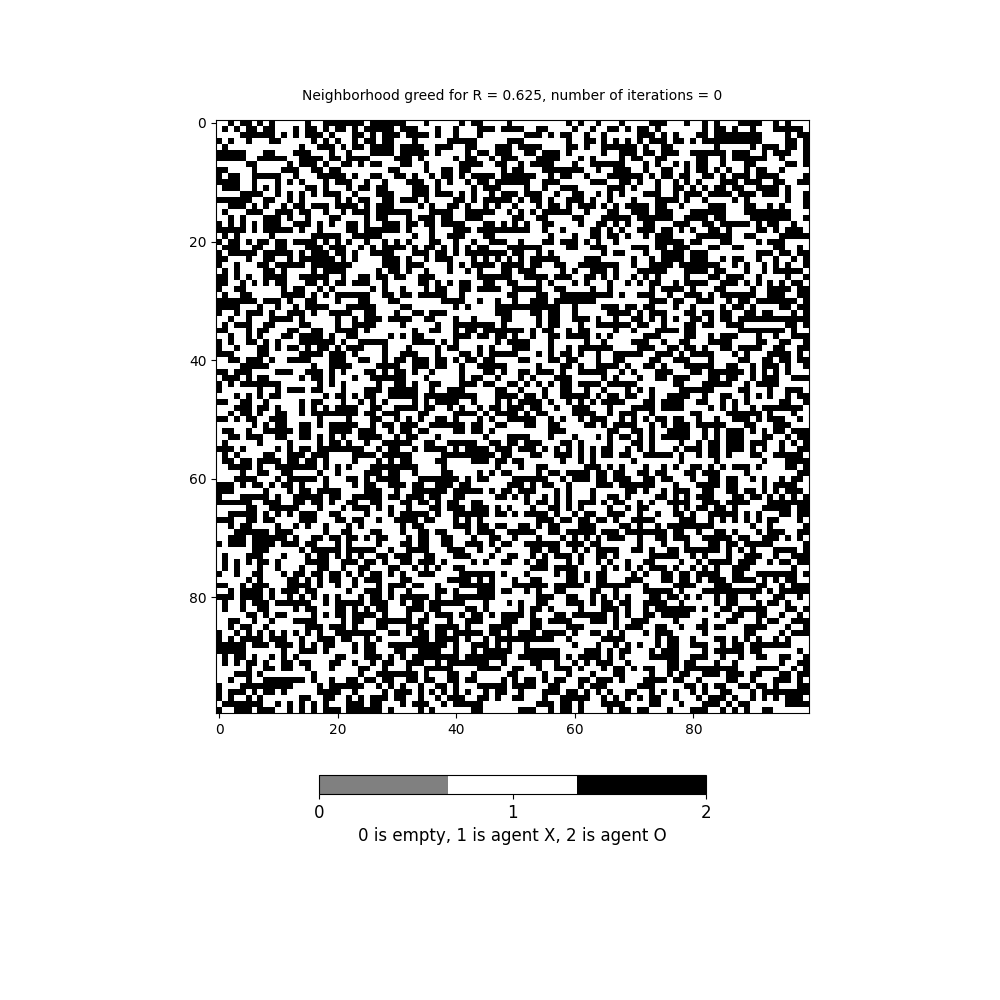

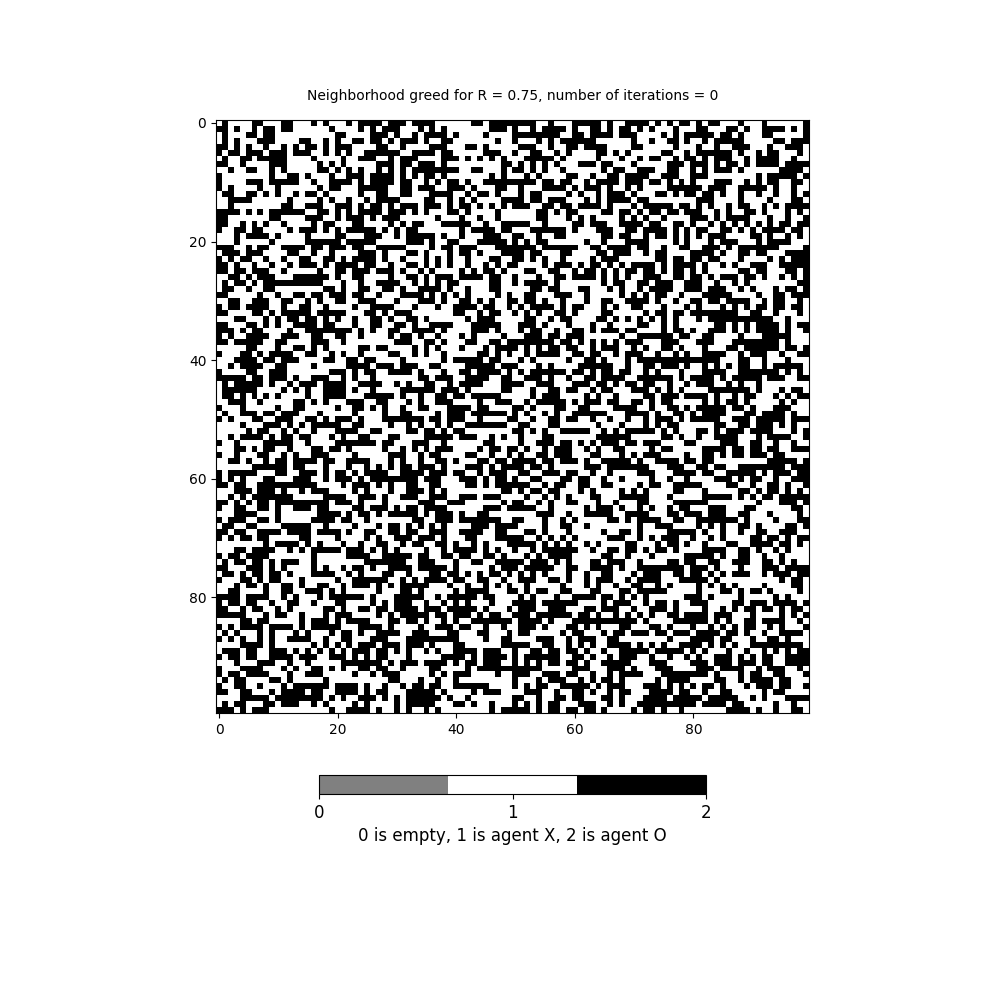

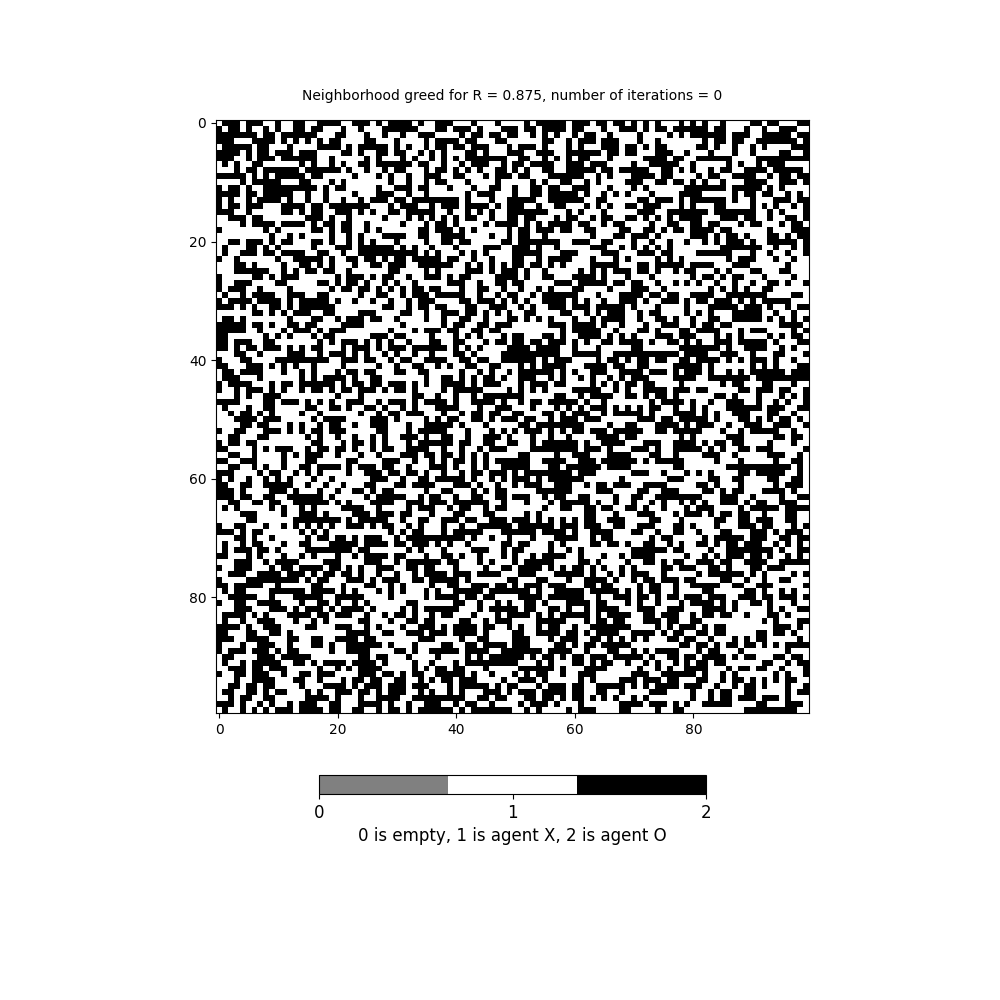

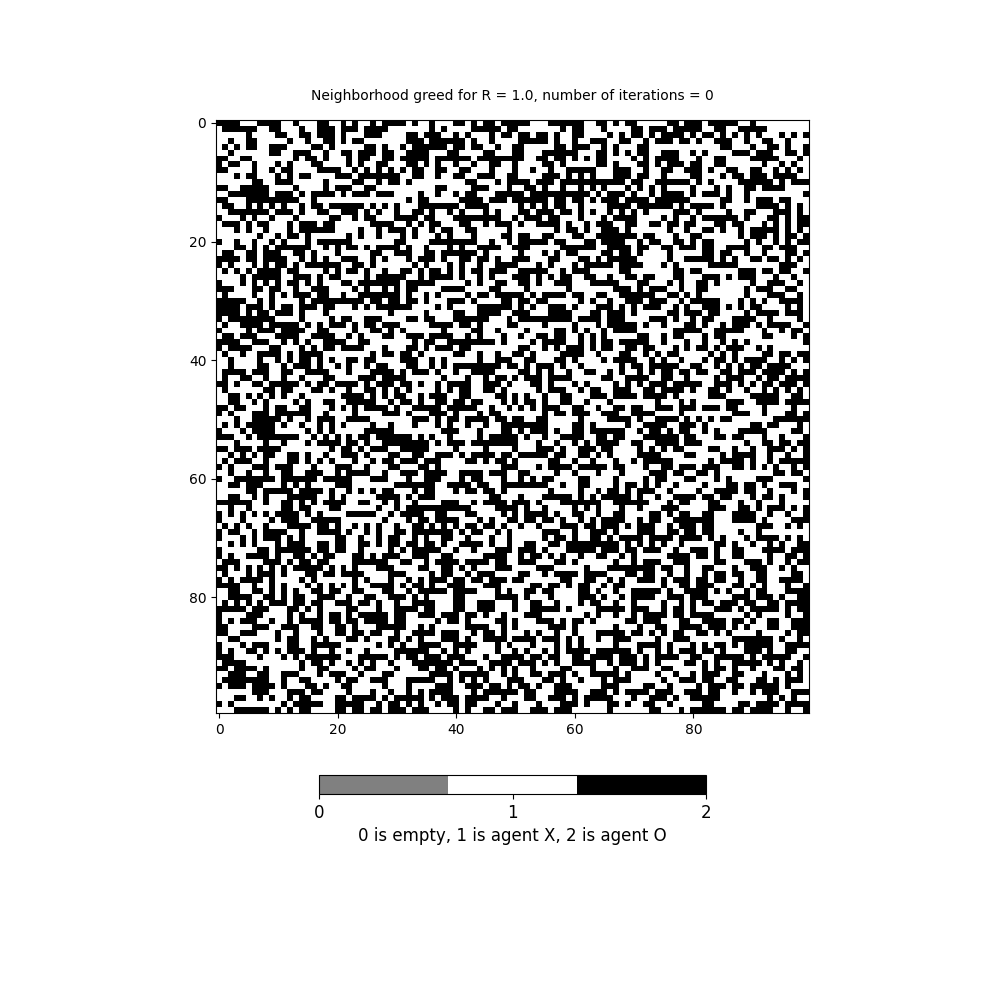

In [18]:
import os, glob
from IPython.display import Image, display

# Create an empty list to store Image objects
gifs = []

# Iterate over sorted GIF files in the current directory
for i in sorted(glob.glob('*.gif')):
  # Append each Image object to the list
  gifs.append(Image(filename=i, width=500))

# Display the list of Image objects in the IPython environment
display(*gifs)


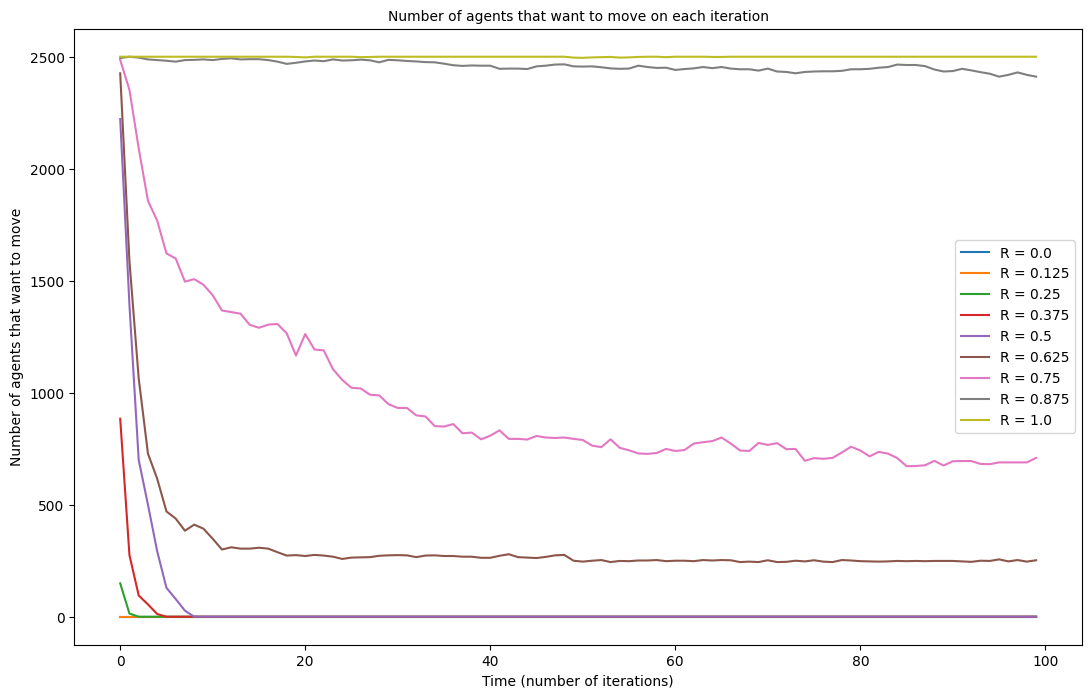

In [19]:
def plot_curve(size, iters):
  # Create a new figure with a specified size
  plt.figure(figsize=(13, 8))

  # Iterate over different values of R to plot the curves
  for r_n in range(9):
    # Get the evolution curve for the current R value
    curve = grid_evolution(r_n/8, size, iters)[1]

    # Plot the curve with a label indicating the R value
    plt.plot(curve, label="R = " + str(r_n/8))

  # Set plot title, xlabel, ylabel, and show legend
  plt.title('Number of agents that want to move on each iteration')
  plt.xlabel('Time (number of iterations)')
  plt.ylabel('Number of agents that want to move')
  plt.legend()

# Call the function with specified size and number of iterations
plot_curve(50, 100)
